In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
library(ggplot2)
library(knitr)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players<- read_csv("players.csv")
players

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,NA,NA
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,NA,NA
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,NA,NA


In [3]:
sessions <- read_csv("sessions.csv")
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [4]:
summary(players)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
     name              gender               age        individualId  
 Length:196         Length:196         Min.   : 8.00   Mode:logical  
 Class :character   Class :character   1st Qu.:17.00   NA's:196      
 Mode  :character   Mode  :character   Median :19.00                 
                                       Mean   :21.28                 
                                       3rd Qu.:22.00                 
                                       Max.   :99.00                 

In [5]:
summary(sessions)

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

PART 1 DATA DESCRIPTION
- two datasets named "players" and "sessions" 

-The players dataset contains 196 rows (observations) and 9 columns, each detailing demographic and gaming behavior information about individual players. The columns include IndividualId, name, age, gender, subscription, experience level, played hours, OrganizationName, and hashedEmail.
- In addition, age and the played hours are the only numeric variables while the rest are categorial variable except hashedEmail which can be considered as unique ID to all players.
- It is observable that IndividualId and OrganizationName column does not have any applicable values under it therefore it will be ignored in future analysis.
- Column named experience, age, gender, subscription, and played hours provide very useful information in order to answer the project question however there might be a possible issue with these variables. One of the potential issues is that there may be imbalances in the distribution of subcategories within these variables. For instance, if there is a disproportionately high number of non-binary participants with more played hours, it may bias the results toward that subcategory. This potential imbalance could also affect other categories, such as experience level and age therefore finding the average of each subcategory might give a better picture.
  
- sessions data set has 5 columns and 1535 rows. Each column's names is hashedEmail, start_time	, end_time,original_start_time	and original_end_time. “original_start_time” and “original_end_time” refer to the scheduled start and end times in UNIX timestamp format while “start_time” and “end_time” refer to the actual start and end times of the session and these are numeric variables. One of the issue that i observe in the data is that time and date are given in the same column so we need to tidy up that by separating the information into two diferent columns. 
- In addition, both datasets has a common column name called hashedemail which can be used if we need to merge two datasets together.

PART 2 QUESTION
- Question 1: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts is the question that I am interested in exploring. 
- response variable played hours
- explanatory varaibles are age , gender and experience level
- figuring out if certain subcategory of age, gender and experience level provide more played hours we can use that information to answer the question what kind of players will contribute a large amount of data. The more played hours give high contribution to large data so that the organization of interest can target those players in their recruiting process.
- To answer the question using the explonatory variables mentioned above, I will group the age column into  0-18, 19-35, 36-45, 46-60, 60+ so that i will be able to recognize any pattern. 

In [6]:
sessions_1 <- sessions %>%
  separate(
    col = start_time,      
    into = c("start_date", "start_time"),  
    sep = " ",               
    remove = TRUE,          
    convert = FALSE          
  ) %>%
  separate(
    col = end_time,         
    into = c("end_date", "end_time"),   
    sep = " ",              
    remove = TRUE,          
    convert = FALSE         
  ) %>%
  unite(
    col = "date_range",    
    start_date, end_date, 
    sep = " to "            
  )


sessions_1

hashedEmail,date_range,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 to 30/06/2024,18:12,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 to 17/06/2024,23:33,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 to 25/07/2024,17:34,17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 to 25/07/2024,03:22,03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 to 25/05/2024,16:01,16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 to 23/06/2024,15:08,17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 to 15/04/2024,07:12,07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 to 21/09/2024,02:13,02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 to 21/06/2024,02:31,02:49,1.71894e+12,1.71894e+12


In [7]:
players_1 <- players %>%
  mutate(age_range = cut(age,
                        breaks = c(0, 18, 30, 45, 60, Inf),
                        labels = c("0-18", "19-30", "31-45", "46-60", "60+"),
                        right = FALSE))
players_1

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName,age_range
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>,<fct>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA,0-18
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA,0-18
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA,0-18
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA,19-30
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA,19-30
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA,0-18
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,NA,NA,19-30
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,NA,NA,19-30
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,NA,NA,0-18


In [8]:
players  %>%
  group_by(experience) %>%
  summarize(average_value = mean(played_hours, na.rm = TRUE))

experience,average_value
<chr>,<dbl>
Amateur,6.0174603
Beginner,1.2485714
Pro,2.6000000
Regular,18.2083333
Veteran,0.6479167


In [9]:
players_1 %>%
  group_by(age_range) %>%
  summarize(average_value = mean(played_hours, na.rm = TRUE))

age_range,average_value
<fct>,<dbl>
0-18,6.4609195
19-30,5.8583333
31-45,0.3428571
46-60,4.6500000
60+,0.1500000


In [10]:
players  %>%
  group_by(gender) %>%
  summarize(average_value = mean(played_hours, na.rm = TRUE))

gender,average_value
<chr>,<dbl>
Agender,6.25000000
Female,10.63513514
Male,4.12741935
Non-binary,14.88000000
Other,0.20000000
Prefer not to say,0.37272727
Two-Spirited,0.08333333


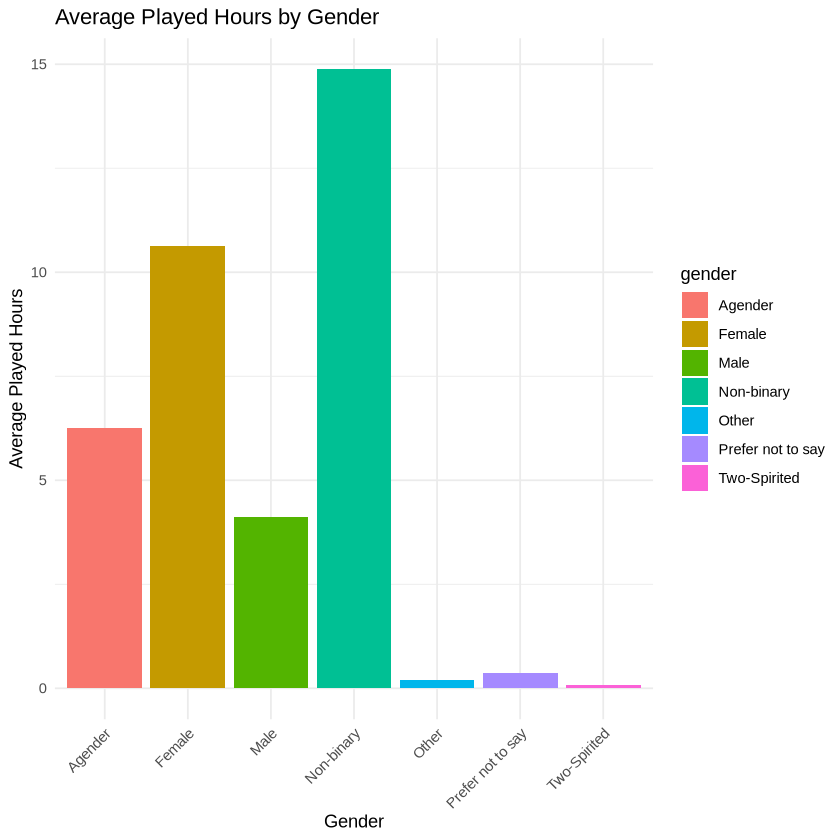

In [11]:
players %>%
  group_by(gender) %>%
  summarize(average_value = mean(played_hours, na.rm = TRUE)) %>%
  ggplot(aes(x = gender, y = average_value, fill = gender)) + 
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Average Played Hours by Gender", 
       x = "Gender", 
       y = "Average Played Hours") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

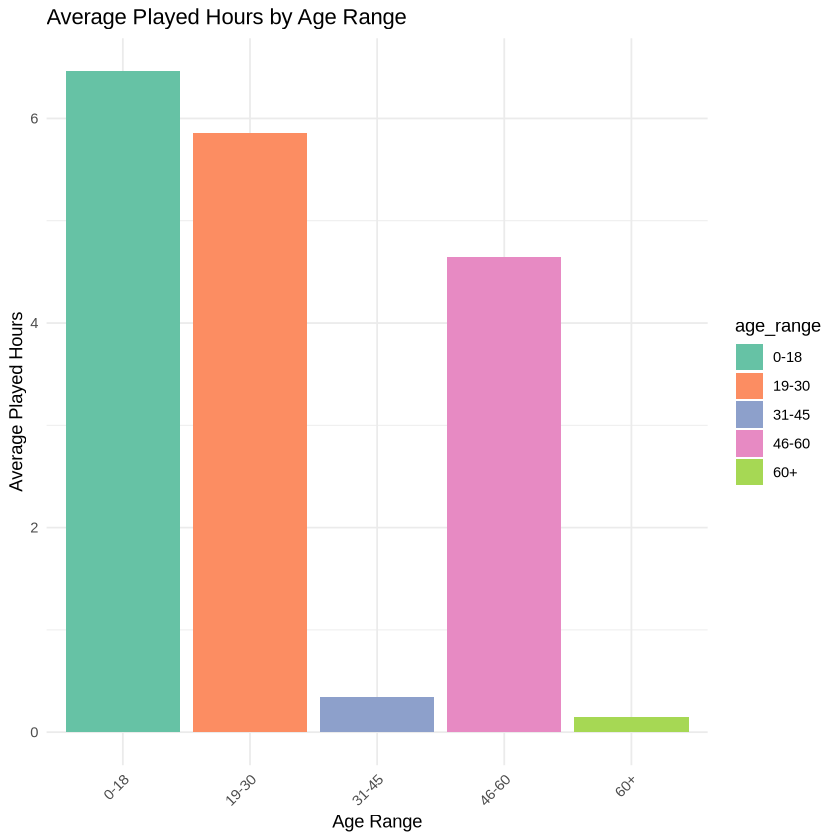

In [12]:
players_1 %>%
  group_by(age_range) %>%
  summarize(average_value = mean(played_hours, na.rm = TRUE)) %>%
  ggplot(aes(x = age_range, y = average_value, fill = age_range)) + 
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Average Played Hours by Age Range", 
       x = "Age Range", 
       y = "Average Played Hours") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Set2")

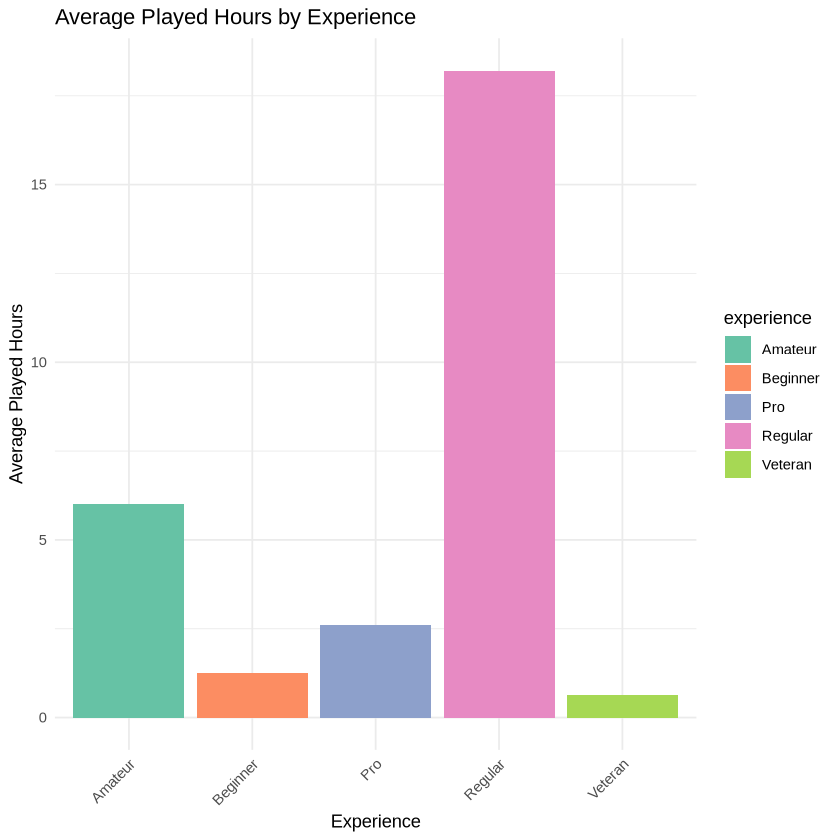

In [13]:
players_1 %>%
  group_by(experience) %>%
  summarize(average_value = mean(played_hours, na.rm = TRUE)) %>%
  ggplot(aes(x = experience, y = average_value, fill = experience)) + 
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Average Played Hours by Experience", 
       x = "Experience", 
       y = "Average Played Hours") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Set2")

PART 3 Exploratory Data Analysis and Visualization
- from the created bar charts it is clear that some subcategory of age, expereience level and gender contribute more to played hours.

PART 4
Method- knn-classification

- Why is this method appropriate?
  Knn- classification works well with non-linear relationship so in case if the relationship between age, experience, gender and played hour did not have any linear relationship, knn-regression will give a good prediction since it is based on the distance between neigbouring points.
- Which assumptions are required, if any, to apply the method selected?
-Knn-classification is not based on assumption but it requires all variables necessary for predictions to be scaled and standardized. In addition, sufficient amount of data is required to make a good prediction.
  
-What are the potential limitations or weaknesses of the method selected?
-One of the limitation is that knn-classification is sensitive to outlier and knn-classification heavliy dependent on the k value (number of neighbour) that we use for prediction. An inappropriate k value can make mistakes while prediction.

How are you going to compare and select the model?
- Use cross validation to evaluate the prediction performance. 

-How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?

-split the data into training and testing set (typically 75 % for training and 25% for testing)
- Scale and standardize all the variable that I am using for prediction
- use cross validation (5-fold) to compare different values of k
- Use 5-fold cross-validation on the training set to compare different 
k values, selecting the one that minimizes the Root Mean Square Error (RMSE).
- Apply the optimal k to the final model and evaluate on the test set to obtain a generalization error estimate